**Data Preprocessing**

In [1]:
import pandas as pd   # Importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive  # adding the google drive to acces the dataset
drive.mount('/content/drive')

Mounted at /content/drive


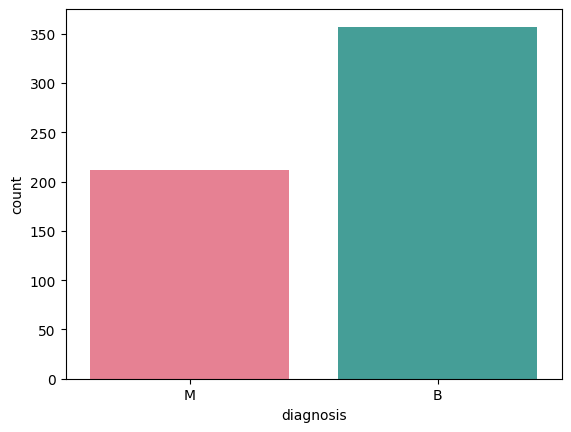

<Axes: >

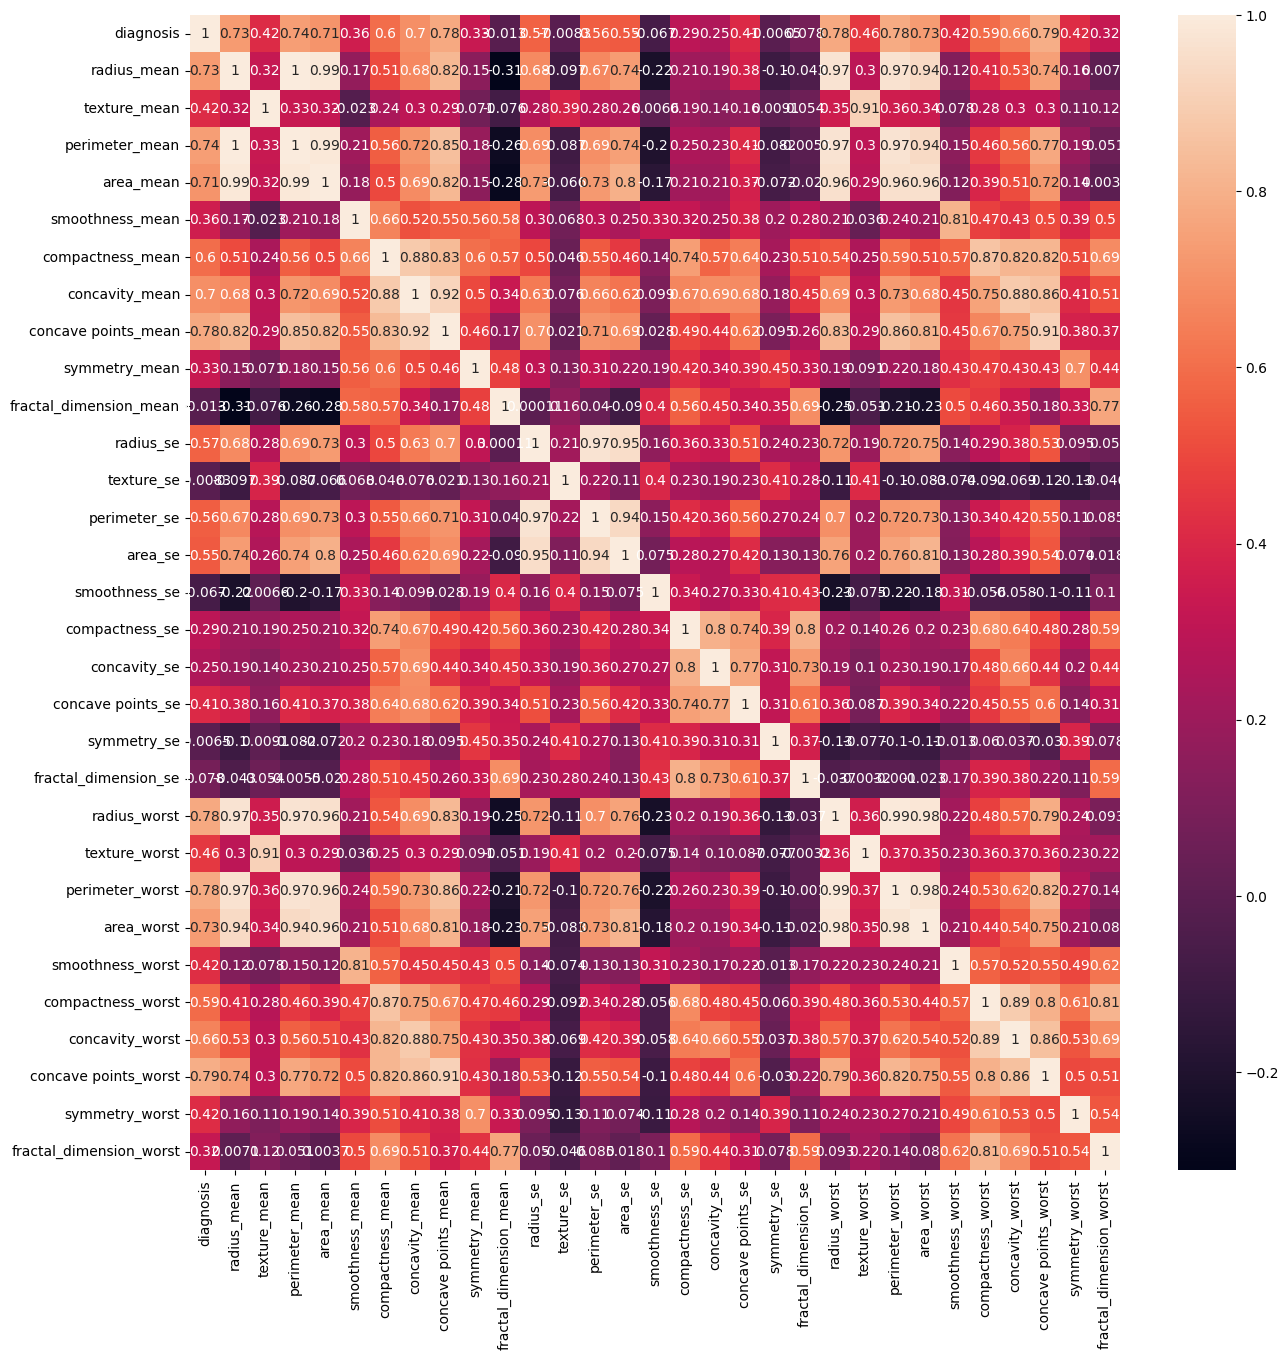

In [ ]:
dataset1 = pd.read_csv("/content/drive/MyDrive/CSE422 Project/raw_dataset.csv")     #accessing the dataset
dataset1.diagnosis.unique()
dataset1['diagnosis'].value_counts()
sns.countplot(x='diagnosis', data=dataset1, palette='husl')                                              #Plotting a bar char to show the classes
plt.show()

dataset = dataset1.drop(["id","Unnamed: 32"],axis=1)                                                     #Removing the unnecessary columns
dataset['diagnosis'] = dataset['diagnosis'].map({'M':1,'B':0})                                          #Encoding Malignant as 1 and Benign as 0
x = dataset.drop(['diagnosis'],axis=1)                                                                               #Creating the input 'x' without diagnosis column
y = dataset['diagnosis']                                                                                                      # Storing the output(diagnosis) as y
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=40)   # Taking 30% of the data(171 samples) for testing and 70% for training
ss = StandardScaler()

X_train = ss.fit_transform(x_train)                                                                                     # Applying Standard Scaler to reduce the skewness
X_test = ss.fit_transform(x_test)                                                                                        # but keeping the correlation constant.

plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(), annot=True)                                                                             #Plotting the heatmap


**Model_1: Logistic Regression**

The Training accuracy of the model is 0.99
The Testing accuracy of the model is 0.96

classification report for Logistic Regrression

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       115
           1       0.93      0.96      0.95        56

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.97      0.96      0.97       171



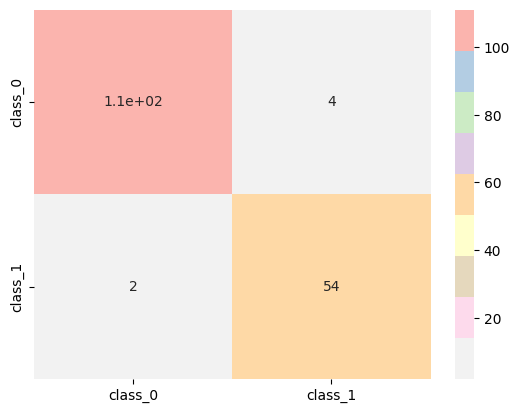

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression()

model1 = logisticReg.fit(X_train, y_train)
prediction1 = model1.predict(X_test)
print("The Training accuracy of the model is {:.2f}".format(logisticReg.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(logisticReg.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix #importing confusion matrix
confmat = confusion_matrix(y_test, prediction1)    #[true_positive, false_positive]
                                                   #[false_negative, true_negative]
from seaborn import heatmap
heatmap(confmat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)



from sklearn.metrics import classification_report
print("\nclassification report for Logistic Regrression\n")
print(classification_report(y_test, prediction1))

**Model_2: Decision Tree**



The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.95

classification report for Decision Tree

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       115
           1       0.90      0.96      0.93        56

    accuracy                           0.95       171
   macro avg       0.94      0.96      0.95       171
weighted avg       0.96      0.95      0.95       171



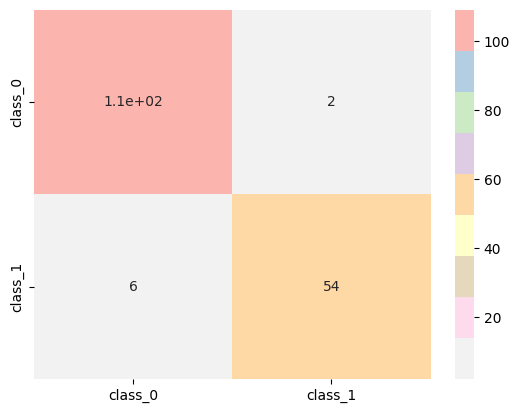

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
model2 = dtc.fit(X_train, y_train)

#Evaluation
print("The Training accuracy of the model is {:.2f}".format(dtc.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(dtc.score(X_test, y_test)))

prediction2 = model2.predict(X_test)
confmat2 = confusion_matrix(prediction2,y_test)

from seaborn import heatmap
heatmap(confmat2 , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)


print("\nclassification report for Decision Tree\n")
print(classification_report(y_test, prediction2))

**Model_3: Random Forest**

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.97

classification report for Random Forest Classifier

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       115
           1       0.93      0.98      0.96        56

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



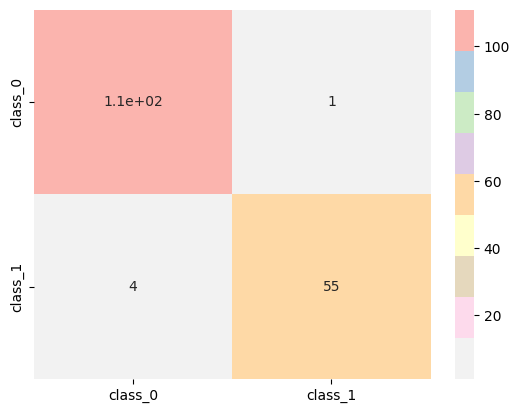

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)


#Evaluation
print("The Training accuracy of the model is {:.2f}".format(rfc.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(X_test, y_test)))

prediction3 = model3.predict(X_test)

confmat3 = confusion_matrix(prediction3,y_test)

from seaborn import heatmap
heatmap(confmat3, cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)

print("\nclassification report for Random Forest Classifier\n")
print(classification_report(y_test, prediction3))

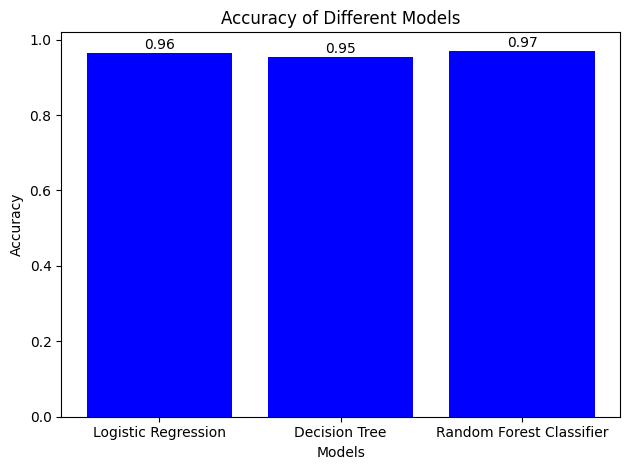

In [ ]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier']

trueposs = confmat[0][0]
trueneg = confmat[1][1]
falseneg = confmat[1][0]
falseposs = confmat[0][1]
logistic_regression_accuracy=((trueposs+trueneg)/(trueposs+trueneg+falseposs+falseneg))

trueposs = confmat2[0][0]
trueneg = confmat2[1][1]
falseneg = confmat2[1][0]
falseposs = confmat2[0][1]
decision_tree_accuracy=((trueposs+trueneg)/(trueposs+trueneg+falseposs+falseneg))


trueposs = confmat3[0][0]
trueneg = confmat3[1][1]
falseneg = confmat3[1][0]
falseposs = confmat3[0][1]
random_forest_accuracy=((trueposs+trueneg)/(trueposs+trueneg+falseposs+falseneg))

accuracy_values = [logistic_regression_accuracy, decision_tree_accuracy, random_forest_accuracy]

plt.bar(model_names, accuracy_values, color='blue')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

for i, value in enumerate(accuracy_values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center')

plt.tight_layout()
plt.show()